# 数据处理

In [13]:
import pandas as pd
import numpy as np

In [14]:
train = pd.read_csv("../train_set.csv")
test = pd.read_csv("../test_set.csv")

In [15]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [16]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [17]:
train[train.contact == "unknown"].count()

ID           7281
age          7281
job          7281
marital      7281
education    7281
default      7281
balance      7281
housing      7281
loan         7281
contact      7281
day          7281
month        7281
duration     7281
campaign     7281
pdays        7281
previous     7281
poutcome     7281
y            7281
dtype: int64

In [18]:
def virtualizationData(items):
    '''
    将数据转成数字
    '''
    item_set = set(items)
    item_ids = {}
    new_item = []
    for (i, item) in enumerate(item_set):
        item_ids[item] = i
    for item in items:
        new_item.append(item_ids[item])
    return new_item
itrain = pd.DataFrame()
itest = pd.DataFrame()
code_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in code_cols:
    itrain[col] = virtualizationData(train[col])
    itest[col] = virtualizationData(test[col])
ori_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in ori_cols:
    itrain[col] = train[col]
    itest[col] = test[col]
itrain["y"] = train["y"]
itrain.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,y
0,10,2,3,0,1,0,0,6,2,43,291,9,150,2,-1,0,0
1,7,0,2,0,1,0,1,5,3,42,5076,7,99,1,251,2,0
2,11,2,0,0,1,1,1,8,2,47,104,14,77,2,-1,0,0
3,10,1,0,0,1,1,1,8,2,28,-994,18,174,2,-1,0,0
4,7,0,0,0,1,0,0,6,2,42,2974,21,187,5,-1,0,0


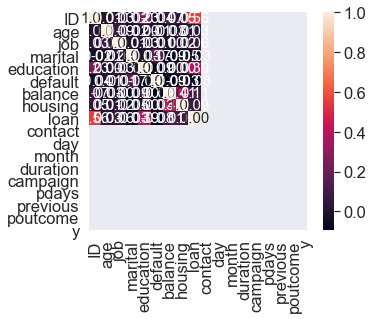

In [19]:
import seaborn as sns
cm = train.corr()
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True,fmt=".2f",annot_kws={"size":15},yticklabels=train.columns,xticklabels=train.columns)
                 #square=True,fmt=".2f",annot_kws={"size":15},yticklabels=train.columns,xticklabels=train.columns)
#sns.pairplot(itrain, size=1.5)

In [20]:
itrain.groupby("y").count()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,,,,,,,,,
0,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356,22356
1,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961


In [21]:
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler  # 欠抽样处理库RandomUnderSampler
from imblearn.ensemble import EasyEnsemble  # 简单集成方法EasyEnsemble
#修正样本

# 模型

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(itrain[code_cols + ori_cols], itrain["y"],
                                                    test_size = 0.3, random_state = 0)

In [23]:
clf = GradientBoostingClassifier(random_state=100)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=100,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [24]:
test_predict = clf.predict_proba(X_test)
train_predict = clf.predict_proba(X_train)

In [25]:
print("test AUC:%.4f" % metrics.roc_auc_score(Y_test, test_predict[:,1]))
print("train AUC:%.4f" % metrics.roc_auc_score(Y_train, train_predict[:,1]))
print("test Accuracy:%.4f" % metrics.accuracy_score(Y_test, clf.predict(X_test)))

test AUC:0.9154
train AUC:0.9348
test Accuracy:0.9048


# 测试数据

In [27]:
real = clf.predict_proba(itest[code_cols + ori_cols])
ans = pd.DataFrame()
ans["ID"] = test.ID
ans["pred"] = pd.DataFrame(real[:,1])
ans.tail()

,ID,pred
10847,36165,0.017659
10848,36166,0.014263
10849,36167,0.012981
10850,36168,0.019305
10851,36169,0.112196


In [28]:
ans.to_csv("../ans_0102.csv", index=False)